In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.optimize import minimize
from scipy.special import softmax
import scipy as sc
import pandas as pd
import seaborn as sns

In [1]:
!pwd

/home/maru/Downloads/DataScienceSuite/notebooks


In [211]:
help(skewnorm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.skewnorm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [322]:
a_list=[]
best_x=[]
scales=[]
for scale in np.round(1.5**(np.arange(20)-7),4):
    for a in np.linspace(-10,10,int(max(scale,1)*100)):
        #plt.plot(x,skewnorm.pdf(x,a,0,0.729))
        best_x_=minimize(lambda x, *args: -skewnorm.pdf((x-0)/scale,a,0,1)/scale, (0,), args=[], method='L-BFGS-B').x
        best_x.append(best_x_[0])
        a_list.append(a)
        scales.append(scale)
df=pd.DataFrame(dict(
    a_list=a_list,
    best_x=best_x,
    scales=scales,
))

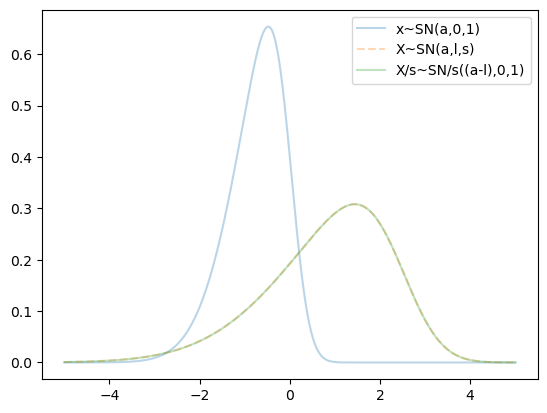

In [309]:
x=np.linspace(-5,5,255)
a=-2.9213
l=2.456
s=2.123
y=skewnorm.pdf(x,a,0,1)
plt.plot(x,y,label='x~SN(a,0,1)',alpha=0.3)
y=skewnorm.pdf(x,a,l,s)
plt.plot(x,y,'--',label='X~SN(a,l,s)',alpha=0.3)
y=skewnorm.pdf((x-l)/s,a,0,1)/s
plt.plot(x,y,label='X/s~SN/s((a-l),0,1)',alpha=0.3)
plt.legend()

In [406]:
dataset=sns.load_dataset('diamonds')

<Axes: ylabel='Frequency'>

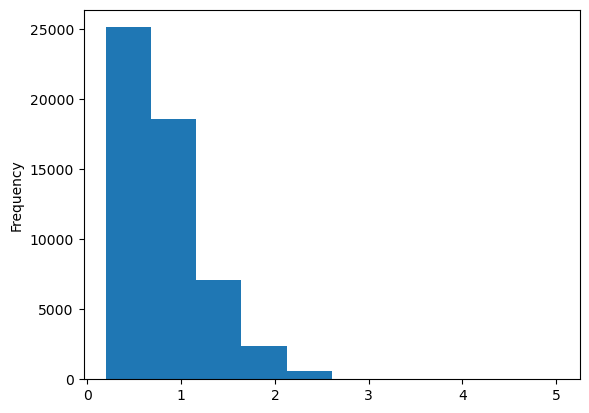

In [417]:
#carat depth table x y z
dataset['carat'].plot.hist()

<Axes: ylabel='Frequency'>

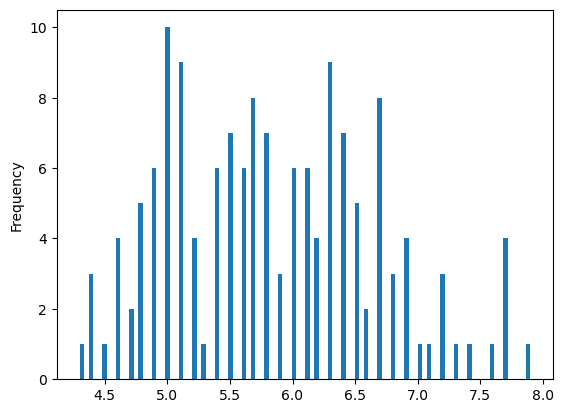

In [388]:
dataset['sepal_length'].plot.hist(bins=100)

In [374]:
from scipy.stats import norm
import scipy

def mode_eq(x, alpha):
    '''
    Defines Ben's first order condition
    '''
    return x*norm.cdf(alpha*x) - alpha*norm.pdf(alpha*x)
alpha  = 2
sol = scipy.optimize.fsolve(mode_eq, 0, args=(alpha,), fprime=None, full_output=0, 
                      col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, 
                           epsfcn=None, factor=100, diag=None)
sol

array([0.53075814])

In [ ]:
data=list(np.random.randn(1000)*1000)
data=data+list(np.random.randn(10)*10+15000)
data=np.array(data)
data=dataset['carat'].dropna()
dmean=data.mean()
dstd=data.std()
data=10*(data-dmean)/dstd
p,p2=fit_mix_skn(data)
x = np.linspace(min(data),max(data),300)
plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
#sns.kdeplot(data, alpha=0.5, label='Data')
y = np.array([mixture_skewnorm(v, p) for v in x])
y /= (np.diff(x).mean()*y).sum()
plt.plot(x, y, label=f'Mixture of Skew-Normals',alpha=0.5)
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()
p2

In [347]:
dataset.select_dtypes(include=float)

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [329]:
p2

{'weight': array([0.76366289, 0.23543791, 0.0008992 ]),
 'loc': array([  5.96525092, 187.6988728 , 262.99999999]),
 'scale': array([1.29222931e+01, 1.22685010e+02, 1.00000000e-03]),
 'alpha': array([ 11.46846808,  -2.24715256, 313.39997802])}

In [252]:
%%timeit
x=np.linspace(-20,20,100)
np.sinh(x)

20.5 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [253]:
%%timeit
x=np.linspace(-20,20,100)
np.cosh(x)

18.1 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [254]:
%%timeit
x=np.linspace(-20,20,100)
np.tanh(x)

18.7 µs ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [256]:
%%timeit
x=np.linspace(-20,20,100)
np.tanh(x)/np.cosh(x)

26.7 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [257]:
df

,a_list,best_x,scales
0,-10.000000,-0.023785,0.1
1,-9.797980,-0.024127,0.1
2,-9.595960,-0.024480,0.1
3,-9.393939,-0.024845,0.1
4,-9.191919,-0.025221,0.1
...,...,...,...
695,9.191919,0.504412,2.0
696,9.393939,0.496907,2.0
697,9.595960,0.489609,2.0
698,9.797980,0.482526,2.0


In [206]:
def f(x, *args):
    y = -skewnorm.pdf(x,*args)
    #print(x, y)
    return y


array([0.27009604])

In [135]:
(x_*y_).mean()

0.09072818098511663

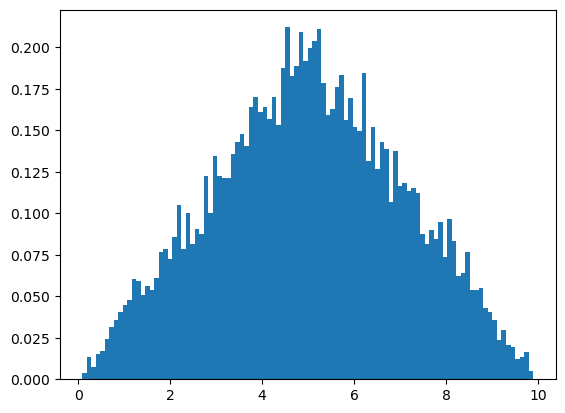

In [159]:
n=10000
data=np.concatenate([
    np.random.triangular(0,5,10,n),
    #np.random.lognormal(0,0.9,n)
]).reshape(-1)
data=data[data<10]
_=plt.hist(data,bins=100,density=True)

In [223]:
import sys

In [225]:
sys.float_info.min

2.2250738585072014e-308

In [226]:
# Define a mixture of skew-normal distributions
def mixture_skewnorm(x, params):
    n = len(params) // 4
    y = np.zeros_like(x)
    weight = softmax(params[0::4])
    loc    = params[1::4]
    scale  = np.maximum(1e-30,np.abs(params[2::4]))
    alpha  = params[3::4]
    for i in range(n):
        y += weight[i] * skewnorm.pdf(x, alpha[i], loc=loc[i], scale=scale[i])
    return y

# Negative log-likelihood
def neg_log_likelihood(params, data):
    x = np.linspace(min(data), max(data), len(data))
    y = mixture_skewnorm(data, params)
    return -np.sum(np.log(y + 1e-9))

In [144]:
"""def mixture_skewnorm(x, params, debug=-1):
    n = len(params) // 4
    y = 0
    weight = softmax(params[0::4])
    loc    = params[1::4]
    scale  = np.maximum(1e-3, params[2::4])
    alpha  = params[3::4]
    #weight = np.array([0.3,0.3,0.4])
    if debug>0:
        print('weight',np.round(weight, debug))
        print('loc',np.round(loc, debug))
        print('scale',np.round(scale, debug))
        print('alpha',np.round(alpha, debug))
    for i in range(n):
        y += weight[i] * skewnorm.pdf(x, alpha[i], loc=loc[i], scale=scale[i])
    return y

# Negative log-likelihood
def neg_log_likelihood(params, data, debug=-1):
    y = mixture_skewnorm(data, params, debug=debug)
    if debug>0:
        print(f'y={y}')
    ret=-np.sum(np.log(y+1e-9))
    if debug>0:
        print(f'ret={ret}')
    return ret"""

In [227]:
def fit_mix_skn(data):
    # Initial parameter guesses
    x=np.linspace(min(data), max(data), len(data))
    kde=sc.stats.gaussian_kde(data,bw_method='scott')
    modes=x[np.argwhere(np.diff(np.sign(np.diff(kde(x))))<0)+1]
    n_components = len(modes)
    initial_params = np.random.randn(n_components*4)
    initial_params[0::4] = np.array([1]*n_components)
    initial_params[1::4] = modes[:,0] #loc
    initial_params[2::4] = 1 #scale
    # Fit the model
    result = minimize(neg_log_likelihood, initial_params, args=(data,), method='L-BFGS-B')
    
    # Extract the fitted parameters
    fitted_params = result.x
    weight = softmax(fitted_params[0::4])
    loc    = fitted_params[1::4]
    scale  = np.maximum(1e-3, fitted_params[2::4])
    alpha  = fitted_params[3::4]
    return fitted_params,{
        'weight':weight,
        'loc':loc,
        'scale':scale,
        'alpha':alpha
    }

In [228]:
p,p2=fit_mix_skn(data)

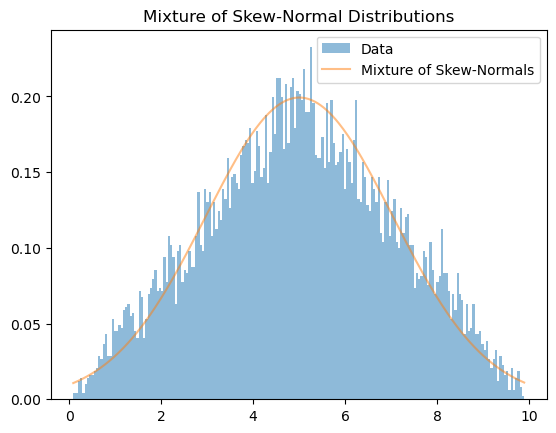

In [231]:
x = np.linspace(min(data),max(data),300)
plt.hist(data, bins=200, density=True, alpha=0.5, label='Data')
#sns.kdeplot(data, alpha=0.5, label='Data')
y = np.array([mixture_skewnorm(v, p) for v in x])
y /= (np.diff(x).mean()*y).sum()
plt.plot(x, y, label=f'Mixture of Skew-Normals',alpha=0.5)
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()

In [165]:
1/(np.diff(x).mean()*y.sum())

3.385934009188926

In [164]:
p2

{'weight': array([1.]),
 'loc': array([4.97140344]),
 'scale': array([2.03381511]),
 'alpha': array([0.01958222])}

In [166]:
(np.diff(x).mean()*y).sum()

0.2953394830750237

In [52]:
y.sum()

2.0311047027836926

In [58]:
pd.Series(data).kde()

AttributeError: 'Series' object has no attribute 'kde'

In [66]:
mixture_skewnorm(0, p, debug=4)

weight [0.3 0.3 0.4]
loc [-29.9916  28.5081]
scale [2.9889 9.4762]
alpha [-0.0203 -1.7404]


0.0002736256714842459

In [49]:
import numpy as np
import hdbscan
from sklearn.datasets import make_blobs
import time

# Generate synthetic data
n_samples = 100000  # Large dataset
random_state = 42
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=2000)

# Measure the time taken for fitting
start_time = time.time()
cluster_labels = clusterer.fit_predict(data.reshape((-1,1)))
end_time = time.time()

print(f"Time taken for HDBSCAN clustering: {end_time - start_time} seconds")
print(f"Number of clusters found: {len(np.unique(cluster_labels))}")
print(f"Number of noise points: {np.sum(cluster_labels == -1)}")


Time taken for HDBSCAN clustering: 0.39660048484802246 seconds
Number of clusters found: 4
Number of noise points: 704


In [15]:
import seaborn as sns
import pandas as pd

In [178]:
right_param=np.array([0.3, 10, 5, 0,
                   0.3,-30, 5, 0,
                   0.4, 25, 3, 0])

In [176]:
neg_log_likelihood(
                  np.array([0.3, 10, 5, 0,
                   0.3,-30, 5, 0,
                   0.4, 25, 3, 0]),
                    data,
                   debug=5
)

weight [0.3 0.3 0.4]
loc [ 10. -30.  25.]
scale [5. 5. 3.]
alpha [0. 0. 0.]


-6.596529480526259

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.optimize import minimize
from scipy.special import softmax

# Define a mixture of skew-normal distributions
def mixture_skewnorm(x, params, debug=-1):
    n = len(params) // 4
    y = 0
    weight = softmax(params[0::4])
    loc    = params[1::4]
    scale  = np.maximum(1e-3, params[2::4])
    alpha  = params[3::4]
    weight = np.array([0.3,0.3,0.4])
    if debug>0:
        print('weight',np.round(weight, debug))
        print('loc',np.round(loc, debug))
        print('scale',np.round(scale, debug))
        print('alpha',np.round(alpha, debug))
    for i in range(n):
        y += weight[i] * skewnorm.pdf(x, alpha[i], loc=loc[i], scale=scale[i])
    return y

params_log=[]

def wrapper(func):
    global params_log
    def inner(*args,**kwargs):
        params_log.append(args[0])
        return func(*args,**kwargs)
    return inner

# Negative log-likelihood
@wrapper
def neg_log_likelihood(params, data, debug=-1):
    y = mixture_skewnorm(data, params, debug=debug)
    if debug>0:
        print(f'y={y}')
    ret=-np.sum(np.log(y+1e-9))
    if debug>0:
        print(f'ret={ret}')
    return ret

# Initial parameter guesses

# Fit the model
result = minimize(neg_log_likelihood, initial_params, args=(data,))

# Extract the fitted parameters
fitted_params = result.x
#fitted_params[0::4]=softmax(fitted_params[0::4])
#fitted_params[3::4]=np.maximum(1e-9,fitted_params[0::4])
# Plot the results
#x = np.linspace(min(data),max(data),len(data))
#y = np.array([mixture_skewnorm(v, fitted_params) for v in x])
#plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
#plt.plot(x, y, label='Mixture of Skew-Normals')
#plt.legend()
#plt.title('Mixture of Skew-Normal Distributions')
#plt.show()


In [321]:
modes

array([[-30.21037086],
       [ 10.02073835],
       [ 24.72894706]])

In [325]:
mixture_skewnorm(0, params_log[0],debug=3)

weight [0.3 0.3 0.4]
loc [-30.21   10.021  24.729]
scale [1.241e+00 1.000e-03 2.340e-01]
alpha [-0.726 -1.61   0.03 ]


1.7353591702459252e-199

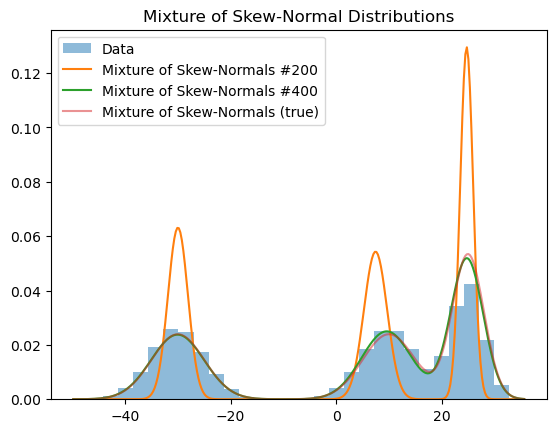

In [332]:
x = np.linspace(min(data),max(data),300)
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
for i in [200,400]:
    y = np.array([mixture_skewnorm(v, params_log[i]) for v in x])
    plt.plot(x, y, label=f'Mixture of Skew-Normals #{i}')
    plt.legend()
y = np.array([mixture_skewnorm(v, right_param) for v in x])
plt.plot(x, y, label=f'Mixture of Skew-Normals (true)',alpha=0.5)
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()

In [241]:
len(params_log)

1573

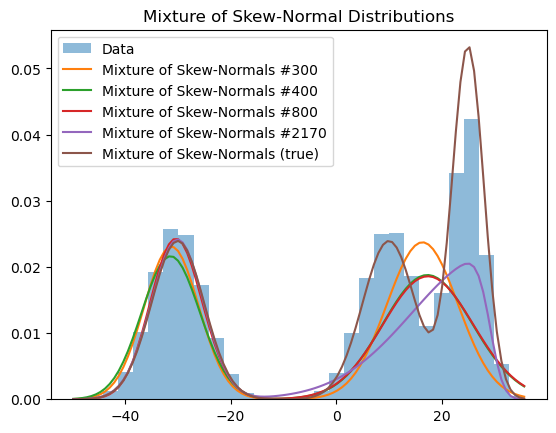

In [322]:
x = np.linspace(min(data),max(data),100)
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
for i in [300,400,800,len(params_log)-1]:
    y = np.array([mixture_skewnorm(v, params_log[i]) for v in x])
    plt.plot(x, y, label=f'Mixture of Skew-Normals #{i}')
    plt.legend()
y = np.array([mixture_skewnorm(v, right_param) for v in x])
plt.plot(x, y, label=f'Mixture of Skew-Normals (true)')
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()

In [273]:
kde=sc.stats.gaussian_kde(data,bw_method='scott')

In [288]:
(np.diff(np.sign(np.diff(kde(x))))<0).sum()

3

In [318]:
np.argwhere(np.diff(np.sign(np.diff(kde(x))))<0)

array([[22],
       [68],
       [85]])

In [319]:
x

array([-49.81182174, -48.9487535 , -48.08568527, -47.22261703,
       -46.35954879, -45.49648056, -44.63341232, -43.77034408,
       -42.90727585, -42.04420761, -41.18113937, -40.31807114,
       -39.4550029 , -38.59193466, -37.72886643, -36.86579819,
       -36.00272995, -35.13966172, -34.27659348, -33.41352524,
       -32.55045701, -31.68738877, -30.82432053, -29.9612523 ,
       -29.09818406, -28.23511582, -27.37204759, -26.50897935,
       -25.64591111, -24.78284288, -23.91977464, -23.05670641,
       -22.19363817, -21.33056993, -20.4675017 , -19.60443346,
       -18.74136522, -17.87829699, -17.01522875, -16.15216051,
       -15.28909228, -14.42602404, -13.5629558 , -12.69988757,
       -11.83681933, -10.97375109, -10.11068286,  -9.24761462,
        -8.38454638,  -7.52147815,  -6.65840991,  -5.79534167,
        -4.93227344,  -4.0692052 ,  -3.20613696,  -2.34306873,
        -1.48000049,  -0.61693225,   0.24613598,   1.10920422,
         1.97227246,   2.83534069,   3.69840893,   4.56

In [294]:
right_param[1::4]

array([ 10., -30.,  25.])

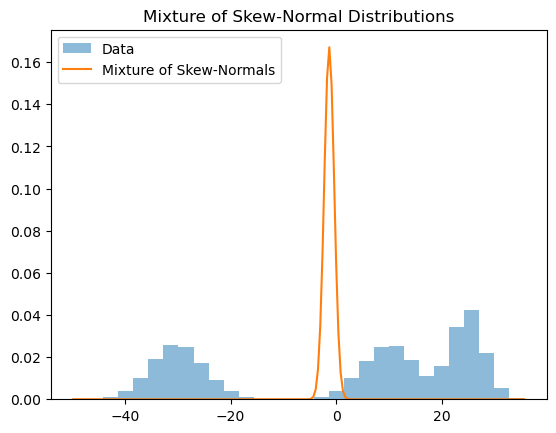

In [218]:
x = np.linspace(min(data),max(data),200)
y = np.array([mixture_skewnorm(v, initial_params) for v in x])
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, y, label='Mixture of Skew-Normals')
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()

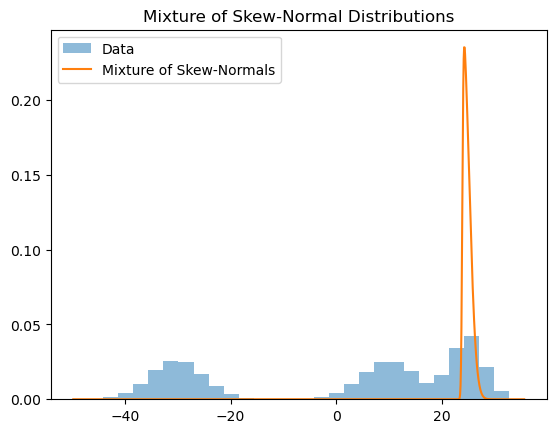

In [219]:
x = np.linspace(min(data),max(data),1000)
y = np.array([mixture_skewnorm(v, fitted_params) for v in x])
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, y, label='Mixture of Skew-Normals')
plt.legend()
plt.title('Mixture of Skew-Normal Distributions')
plt.show()

In [220]:
mixture_skewnorm(0, fitted_params, debug=3)

weight [0.3 0.3 0.4]
loc [ 1.004  1.253 23.904]
scale [1.000e-03 1.000e-03 1.266e+00]
alpha [-1.647  9.171  6.774]


0.0

In [221]:
mixture_skewnorm(0, initial_params, debug=3)

weight [0.3 0.3 0.4]
loc [ 0.89   1.234 -1.122]
scale [0.001 0.001 0.975]
alpha [-1.888 -0.261 -0.259]


0.06466458469173363

In [159]:
np.round(fitted_params.reshape(-1,4),4)

array([[-310.8514,  314.7304,  257.4859,    7.9628],
       [ 156.6782,   21.7577, -159.0651,  443.2675],
       [ 156.6782,   21.7577, -159.0651,  443.2675]])

In [168]:
mixture_skewnorm(0, fitted_params, debug=3)

weight [0.3 0.3 0.4]
loc [10.616 10.392 10.912]
scale [0.001 0.001 0.001]
alpha [5.598 5.285 5.764]


0.0

In [145]:
neg_log_likelihood(initial_params, data)

-5.285913483809937

In [125]:
fitted_params.reshape(-1,4)

array([[3.95632935e-03, 3.89236973e+00, 3.77681121e+00, 5.03734823e+00],
       [4.98021835e-01, 9.79963239e+00, 1.12663147e+00, 4.59759109e+00],
       [4.98021835e-01, 9.79962396e+00, 1.12663159e+00, 4.59759384e+00]])

In [106]:
test=np.arange(12)
test.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [117]:
sc.special.softmax(test[2::4])

array([3.29320439e-04, 1.79802867e-02, 9.81690393e-01])

In [100]:
initial_params[::4]

array([0.5, 1. , 1. ])

In [102]:
initial_params[2::4]

array([0., 1., 1.])

In [99]:
skewnorm.pdf(0, 0,0,1)

0.3989422804014327

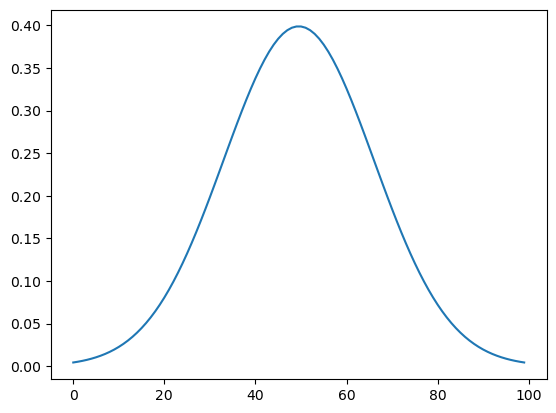

In [98]:
plt.plot(skewnorm.pdf(np.linspace(-3,3,100), 0, loc=0, scale=1))

In [80]:
fitted_params

array([244.99142996, 180.46972216, 171.85941439,  42.32854338,
       -22.85688493,  16.69202158,  77.55727653, 118.61170935,
        67.8413857 , -36.76386746, -85.81227262, -37.48736901])

In [81]:
np.linspace(min(data), max(data), len(data))

array([-49.81182174, -49.80897352, -49.8061253 , ...,  35.62623724,
        35.62908546,  35.63193368])